<a href="https://colab.research.google.com/github/varunbommagunta/Machine_Learning/blob/main/Dimensionality_Reduction/t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##t-Distributed Stochastic Neighbor Embedding

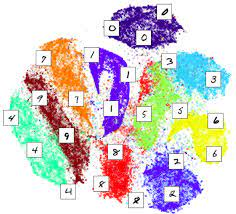

###-> The t in t-SNE represents that it uses t-distibution to cluster rather than a normal distribution.

###-> A t-distribution is lot like a normal distribution except 't' isn't tall in the middle and tails are taller on the ends.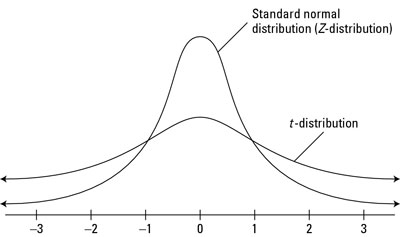

##Implementation

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle competitions download -c digit-recognizer

  0% 0.00/6.09M [00:00<?, ?B/s]
100% 6.09M/6.09M [00:00<00:00, 55.9MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 45.9MB/s]
 65% 6.00M/9.16M [00:00<00:00, 61.3MB/s]
100% 9.16M/9.16M [00:00<00:00, 58.6MB/s]


In [ ]:
train = pd.read_csv('/content/train.csv.zip')
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.shape

(42000, 785)

In [ ]:
train.isna().any().sum()

0

In [ ]:
label = train["label"]
label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [ ]:
train = train.drop(labels = ["label"],axis = 1)

In [ ]:
train = StandardScaler().fit_transform(train)

In [ ]:
pca = PCA(n_components=2)   #  First visualize with PCA
pca_res = pca.fit_transform(train)

In [ ]:
pca_res.shape

(42000, 2)

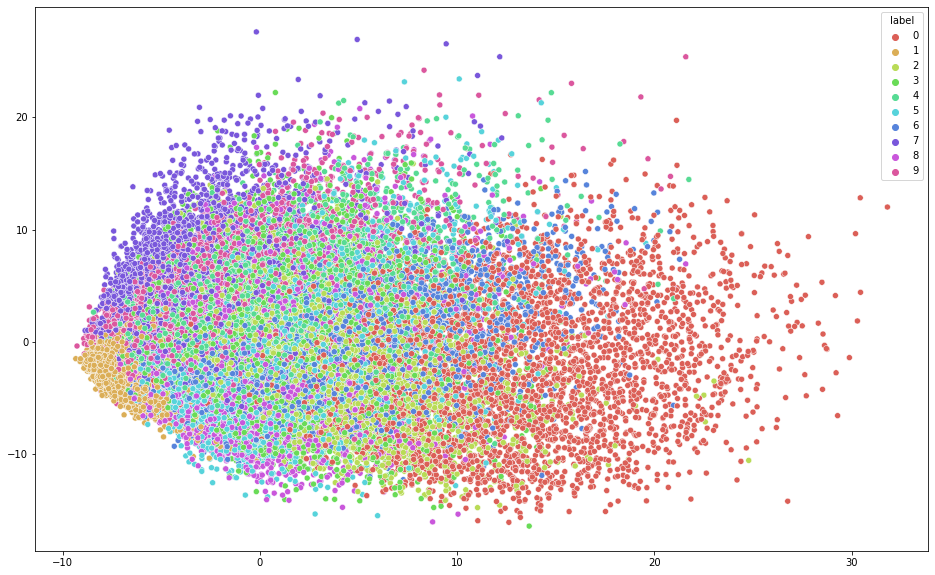

In [ ]:
plt.figure(figsize=(16,10))  #Looks like gibberish
sns.scatterplot(x = pca_res[:,0], y = pca_res[:,1], hue = label, palette = sns.hls_palette(10), legend = 'full');

In [ ]:
%%time
tsne = TSNE(n_components = 2, random_state=0)  #use t-SNE with 2 components
tsne_res = tsne.fit_transform(train)   #Takes 1 hour to train

In [36]:
tsne_res

array([[-42.807545 , -34.29077  ],
       [ 11.887651 ,  49.380413 ],
       [-61.311356 ,   1.4975914],
       ...,
       [ 53.704575 , -13.192651 ],
       [-35.610504 ,  51.831615 ],
       [ 19.639442 , -40.694588 ]], dtype=float32)

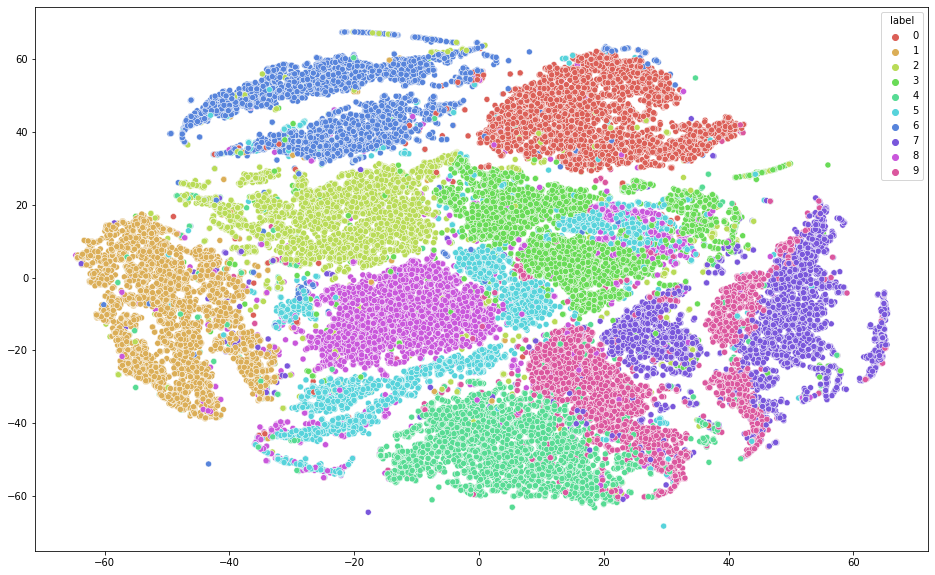

In [37]:
plt.figure(figsize=(16,10))   #looks great

sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = label, palette = sns.hls_palette(10), legend = 'full');

In [38]:
pca = PCA(n_components=50)  #improve this by first applying pca then t-SNE
pca_res_50 = pca.fit_transform(train)

In [39]:
%%time
tsne_res = tsne.fit_transform(pca_res_50)

CPU times: user 15min 58s, sys: 1.24 s, total: 15min 59s
Wall time: 9min 27s


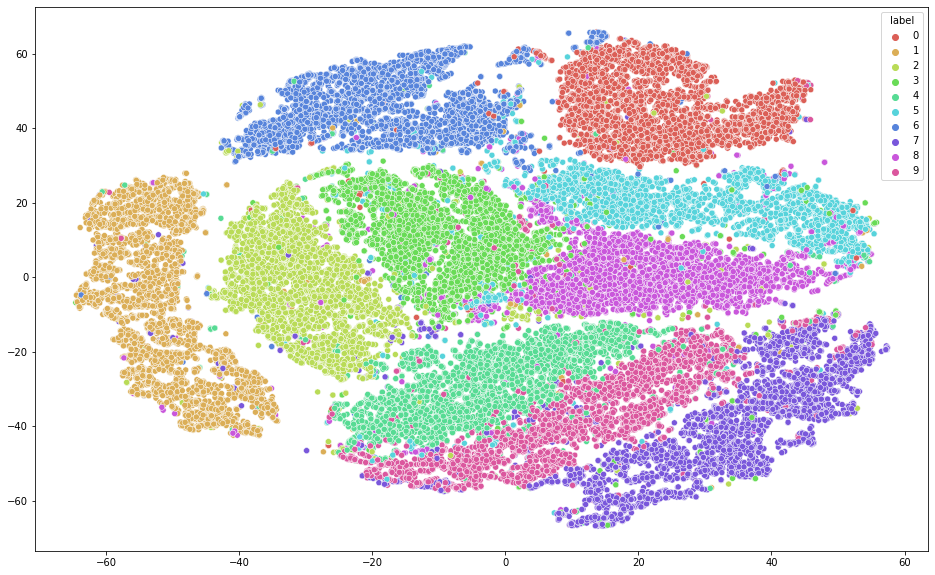

In [40]:
plt.figure(figsize=(16,10))  #perfect
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = label, palette = sns.hls_palette(10), legend = 'full');
